# Fourier Series: Mathematical Foundations and Computational Implementation

## 1. Introduction

The Fourier series is one of the most powerful tools in mathematical analysis, providing a method to decompose periodic functions into sums of simple sinusoidal components. Named after Joseph Fourier (1768-1830), who introduced this technique while studying heat conduction, the Fourier series has become fundamental to signal processing, physics, and engineering.

## 2. Mathematical Theory

### 2.1 Definition

Any periodic function $f(x)$ with period $2L$ can be represented as an infinite sum of sines and cosines:

$$f(x) = \frac{a_0}{2} + \sum_{n=1}^{\infty} \left[ a_n \cos\left(\frac{n\pi x}{L}\right) + b_n \sin\left(\frac{n\pi x}{L}\right) \right]$$

### 2.2 Fourier Coefficients

The coefficients $a_n$ and $b_n$ are determined by the orthogonality properties of trigonometric functions:

$$a_0 = \frac{1}{L} \int_{-L}^{L} f(x) \, dx$$

$$a_n = \frac{1}{L} \int_{-L}^{L} f(x) \cos\left(\frac{n\pi x}{L}\right) dx, \quad n \geq 1$$

$$b_n = \frac{1}{L} \int_{-L}^{L} f(x) \sin\left(\frac{n\pi x}{L}\right) dx, \quad n \geq 1$$

### 2.3 Complex Form

The Fourier series can also be expressed in complex exponential form:

$$f(x) = \sum_{n=-\infty}^{\infty} c_n e^{i n \pi x / L}$$

where:

$$c_n = \frac{1}{2L} \int_{-L}^{L} f(x) e^{-i n \pi x / L} dx$$

### 2.4 Parseval's Theorem

A fundamental result connecting the energy in the time domain to the frequency domain:

$$\frac{1}{2L} \int_{-L}^{L} |f(x)|^2 dx = \frac{|a_0|^2}{4} + \frac{1}{2} \sum_{n=1}^{\infty} (|a_n|^2 + |b_n|^2)$$

### 2.5 Convergence Properties

- **Pointwise convergence**: At points where $f$ is continuous, the series converges to $f(x)$
- **Gibbs phenomenon**: Near discontinuities, the partial sums overshoot by approximately 9%
- **Mean-square convergence**: $\lim_{N\to\infty} \int_{-L}^{L} |f(x) - S_N(x)|^2 dx = 0$

## 3. Computational Implementation

We will implement Fourier series approximations for several classic functions and visualize the convergence behavior.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

# Set up plotting style
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 11
plt.rcParams['axes.grid'] = True
plt.rcParams['grid.alpha'] = 0.3

### 3.1 Fourier Coefficient Calculator

We implement a general function to compute Fourier coefficients numerically using numerical integration.

In [2]:
def compute_fourier_coefficients(f, L, N):
    """
    Compute the Fourier coefficients a_n and b_n for a function f with period 2L.
    
    Parameters:
    -----------
    f : callable
        The periodic function to decompose
    L : float
        Half-period of the function
    N : int
        Number of terms to compute
    
    Returns:
    --------
    a : ndarray
        Cosine coefficients (a_0, a_1, ..., a_N)
    b : ndarray
        Sine coefficients (b_1, b_2, ..., b_N)
    """
    a = np.zeros(N + 1)
    b = np.zeros(N)
    
    # Compute a_0
    a[0] = (1/L) * integrate.quad(f, -L, L)[0]
    
    # Compute a_n and b_n for n >= 1
    for n in range(1, N + 1):
        # a_n coefficient
        integrand_a = lambda x: f(x) * np.cos(n * np.pi * x / L)
        a[n] = (1/L) * integrate.quad(integrand_a, -L, L)[0]
        
        # b_n coefficient
        if n <= N:
            integrand_b = lambda x, n=n: f(x) * np.sin(n * np.pi * x / L)
            b[n-1] = (1/L) * integrate.quad(integrand_b, -L, L)[0]
    
    return a, b


def fourier_series_partial_sum(x, a, b, L):
    """
    Evaluate the partial Fourier series at points x.
    
    Parameters:
    -----------
    x : ndarray
        Points at which to evaluate
    a : ndarray
        Cosine coefficients
    b : ndarray
        Sine coefficients
    L : float
        Half-period
    
    Returns:
    --------
    S : ndarray
        Partial sum values at x
    """
    S = a[0] / 2 * np.ones_like(x)
    
    for n in range(1, len(a)):
        S += a[n] * np.cos(n * np.pi * x / L)
        if n <= len(b):
            S += b[n-1] * np.sin(n * np.pi * x / L)
    
    return S

### 3.2 Example 1: Square Wave

The square wave is a classic example that demonstrates the Gibbs phenomenon. For a square wave with period $2\pi$:

$$f(x) = \begin{cases} 1 & 0 < x < \pi \\ -1 & -\pi < x < 0 \end{cases}$$

The analytical Fourier series is:

$$f(x) = \frac{4}{\pi} \sum_{n=1,3,5,...}^{\infty} \frac{1}{n} \sin(nx)$$

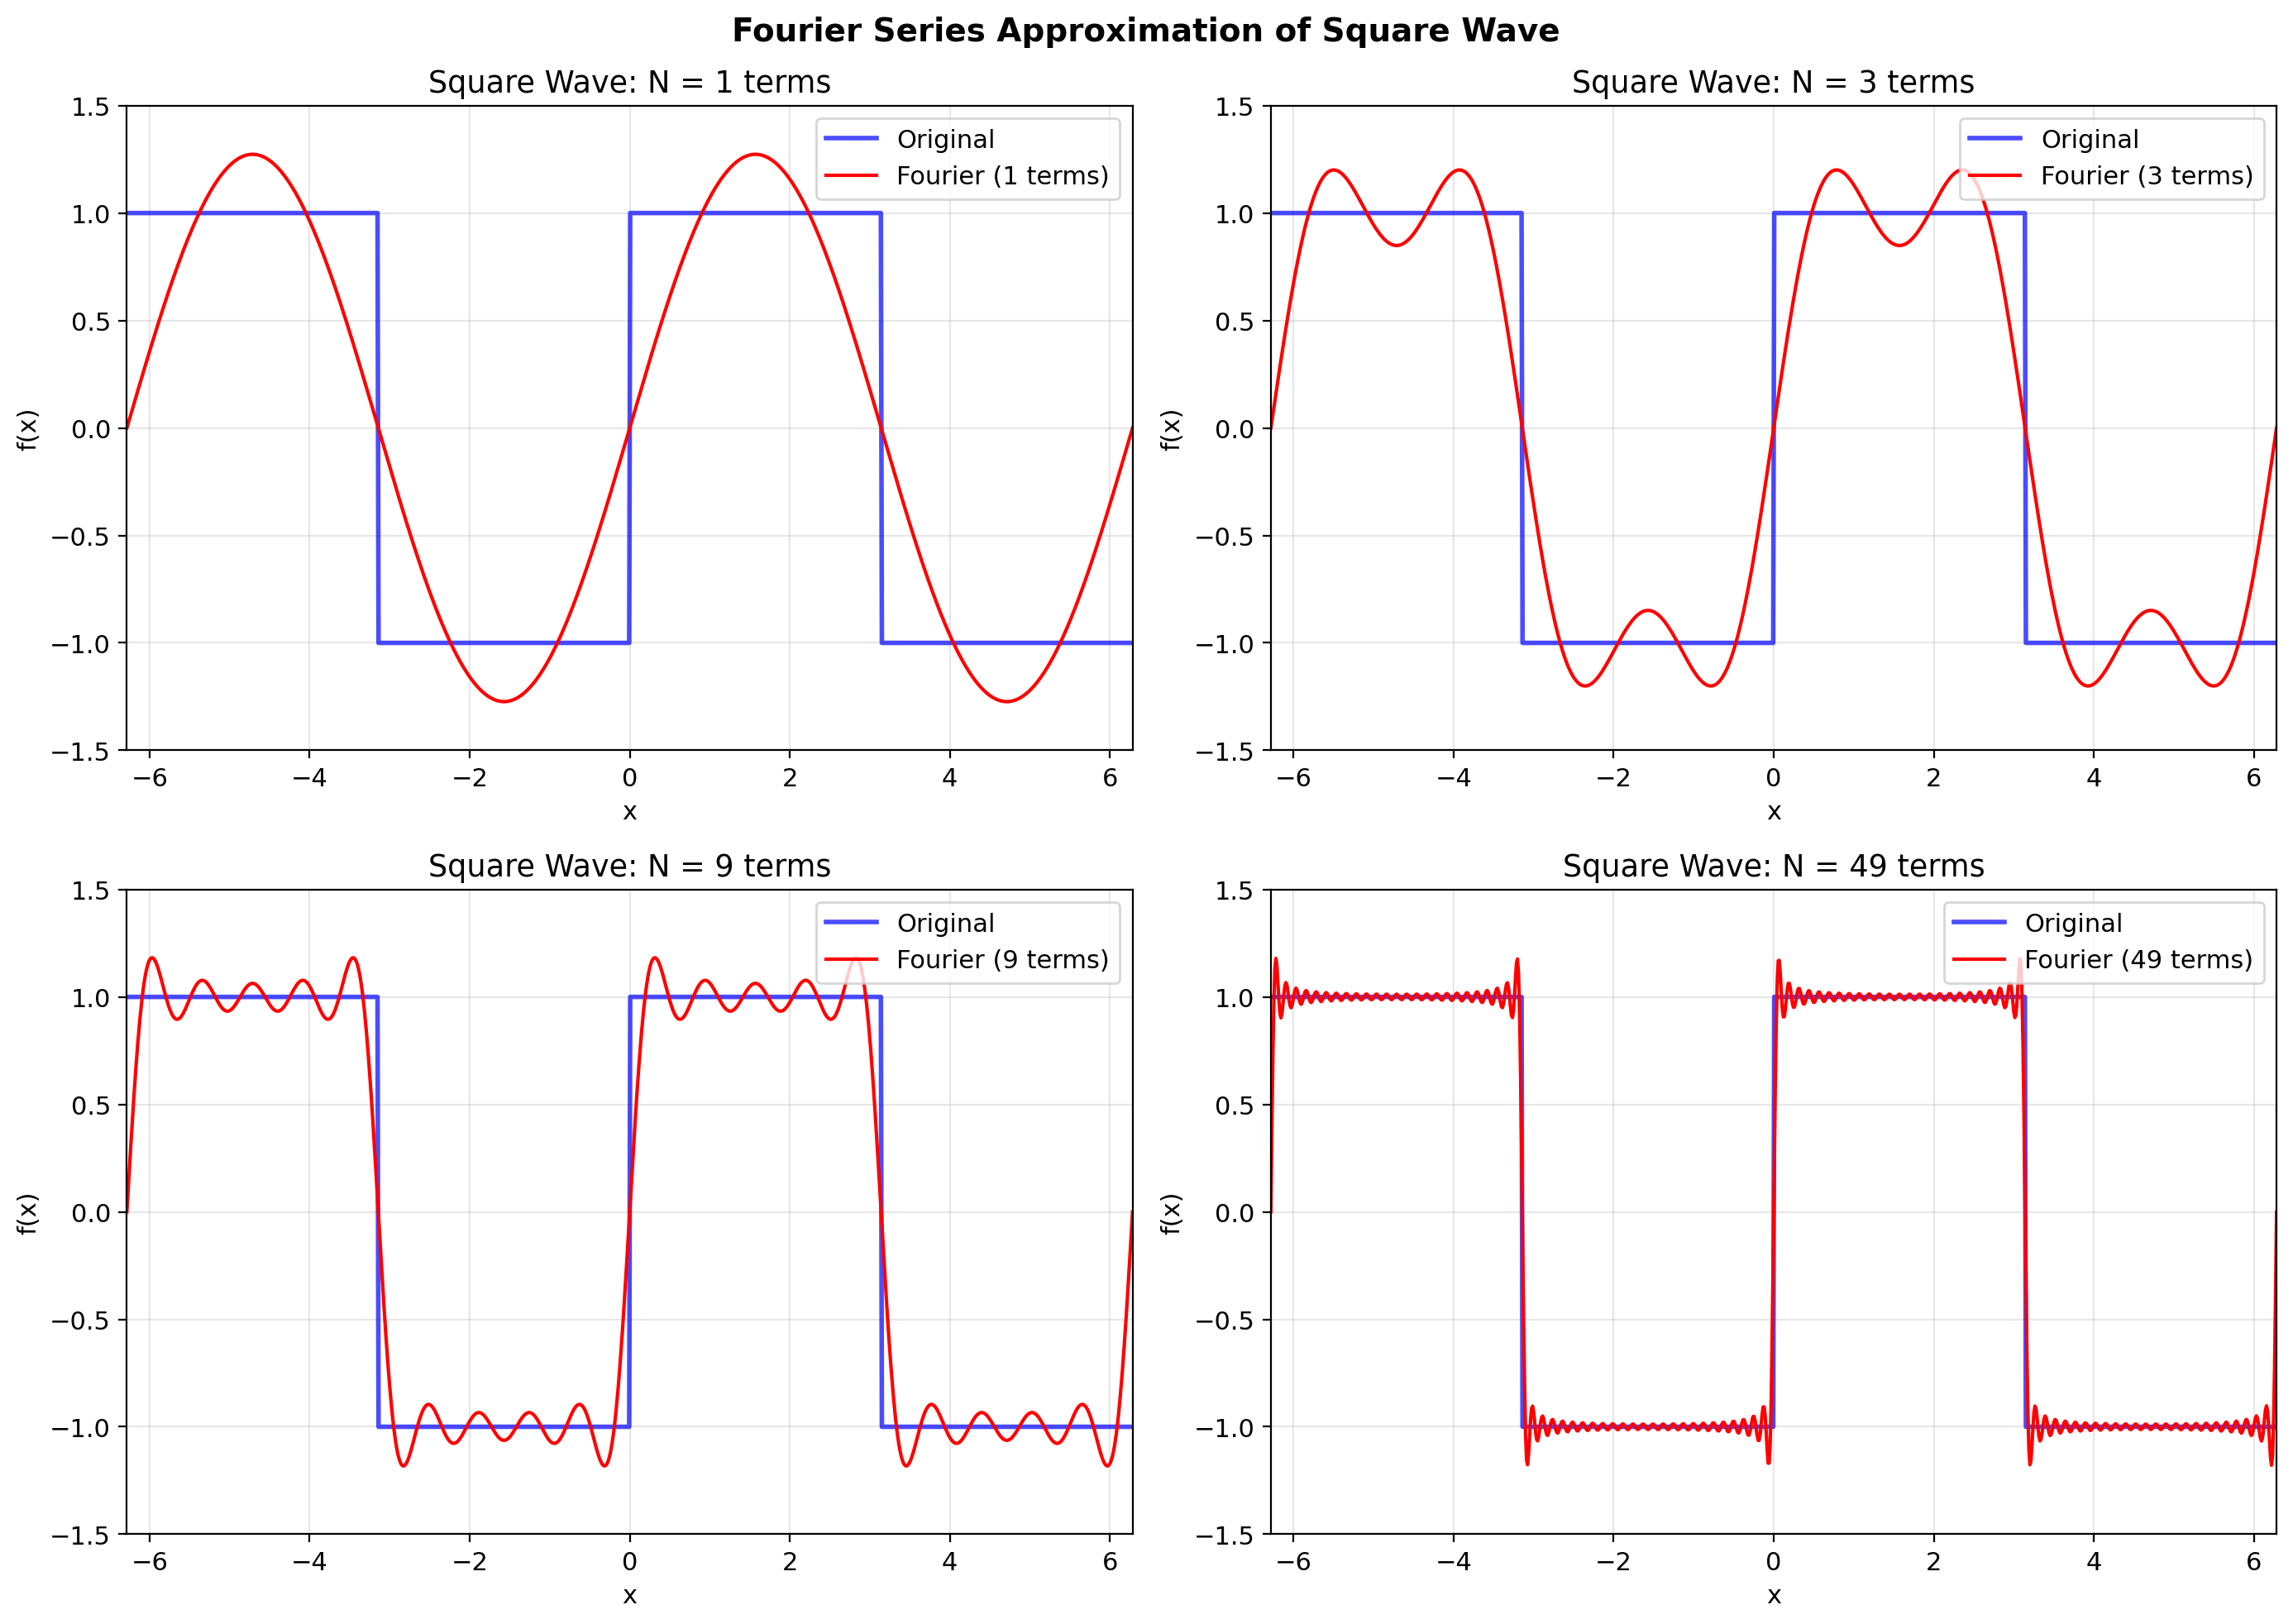

In [3]:
# Define the square wave
def square_wave(x):
    """Square wave function with period 2π."""
    return np.sign(np.sin(x))

# Parameters
L = np.pi  # Half-period
x = np.linspace(-2*np.pi, 2*np.pi, 1000)

# Compute Fourier series for different numbers of terms
terms_list = [1, 3, 9, 49]

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, N in enumerate(terms_list):
    a, b = compute_fourier_coefficients(square_wave, L, N)
    S = fourier_series_partial_sum(x, a, b, L)
    
    axes[idx].plot(x, square_wave(x), 'b-', linewidth=2, label='Original', alpha=0.7)
    axes[idx].plot(x, S, 'r-', linewidth=1.5, label=f'Fourier ({N} terms)')
    axes[idx].set_xlabel('x')
    axes[idx].set_ylabel('f(x)')
    axes[idx].set_title(f'Square Wave: N = {N} terms')
    axes[idx].legend(loc='upper right')
    axes[idx].set_xlim(-2*np.pi, 2*np.pi)
    axes[idx].set_ylim(-1.5, 1.5)

plt.suptitle('Fourier Series Approximation of Square Wave', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 3.3 Example 2: Sawtooth Wave

The sawtooth wave is defined as:

$$f(x) = x \quad \text{for } -\pi < x < \pi$$

Its Fourier series is:

$$f(x) = 2\sum_{n=1}^{\infty} \frac{(-1)^{n+1}}{n} \sin(nx)$$

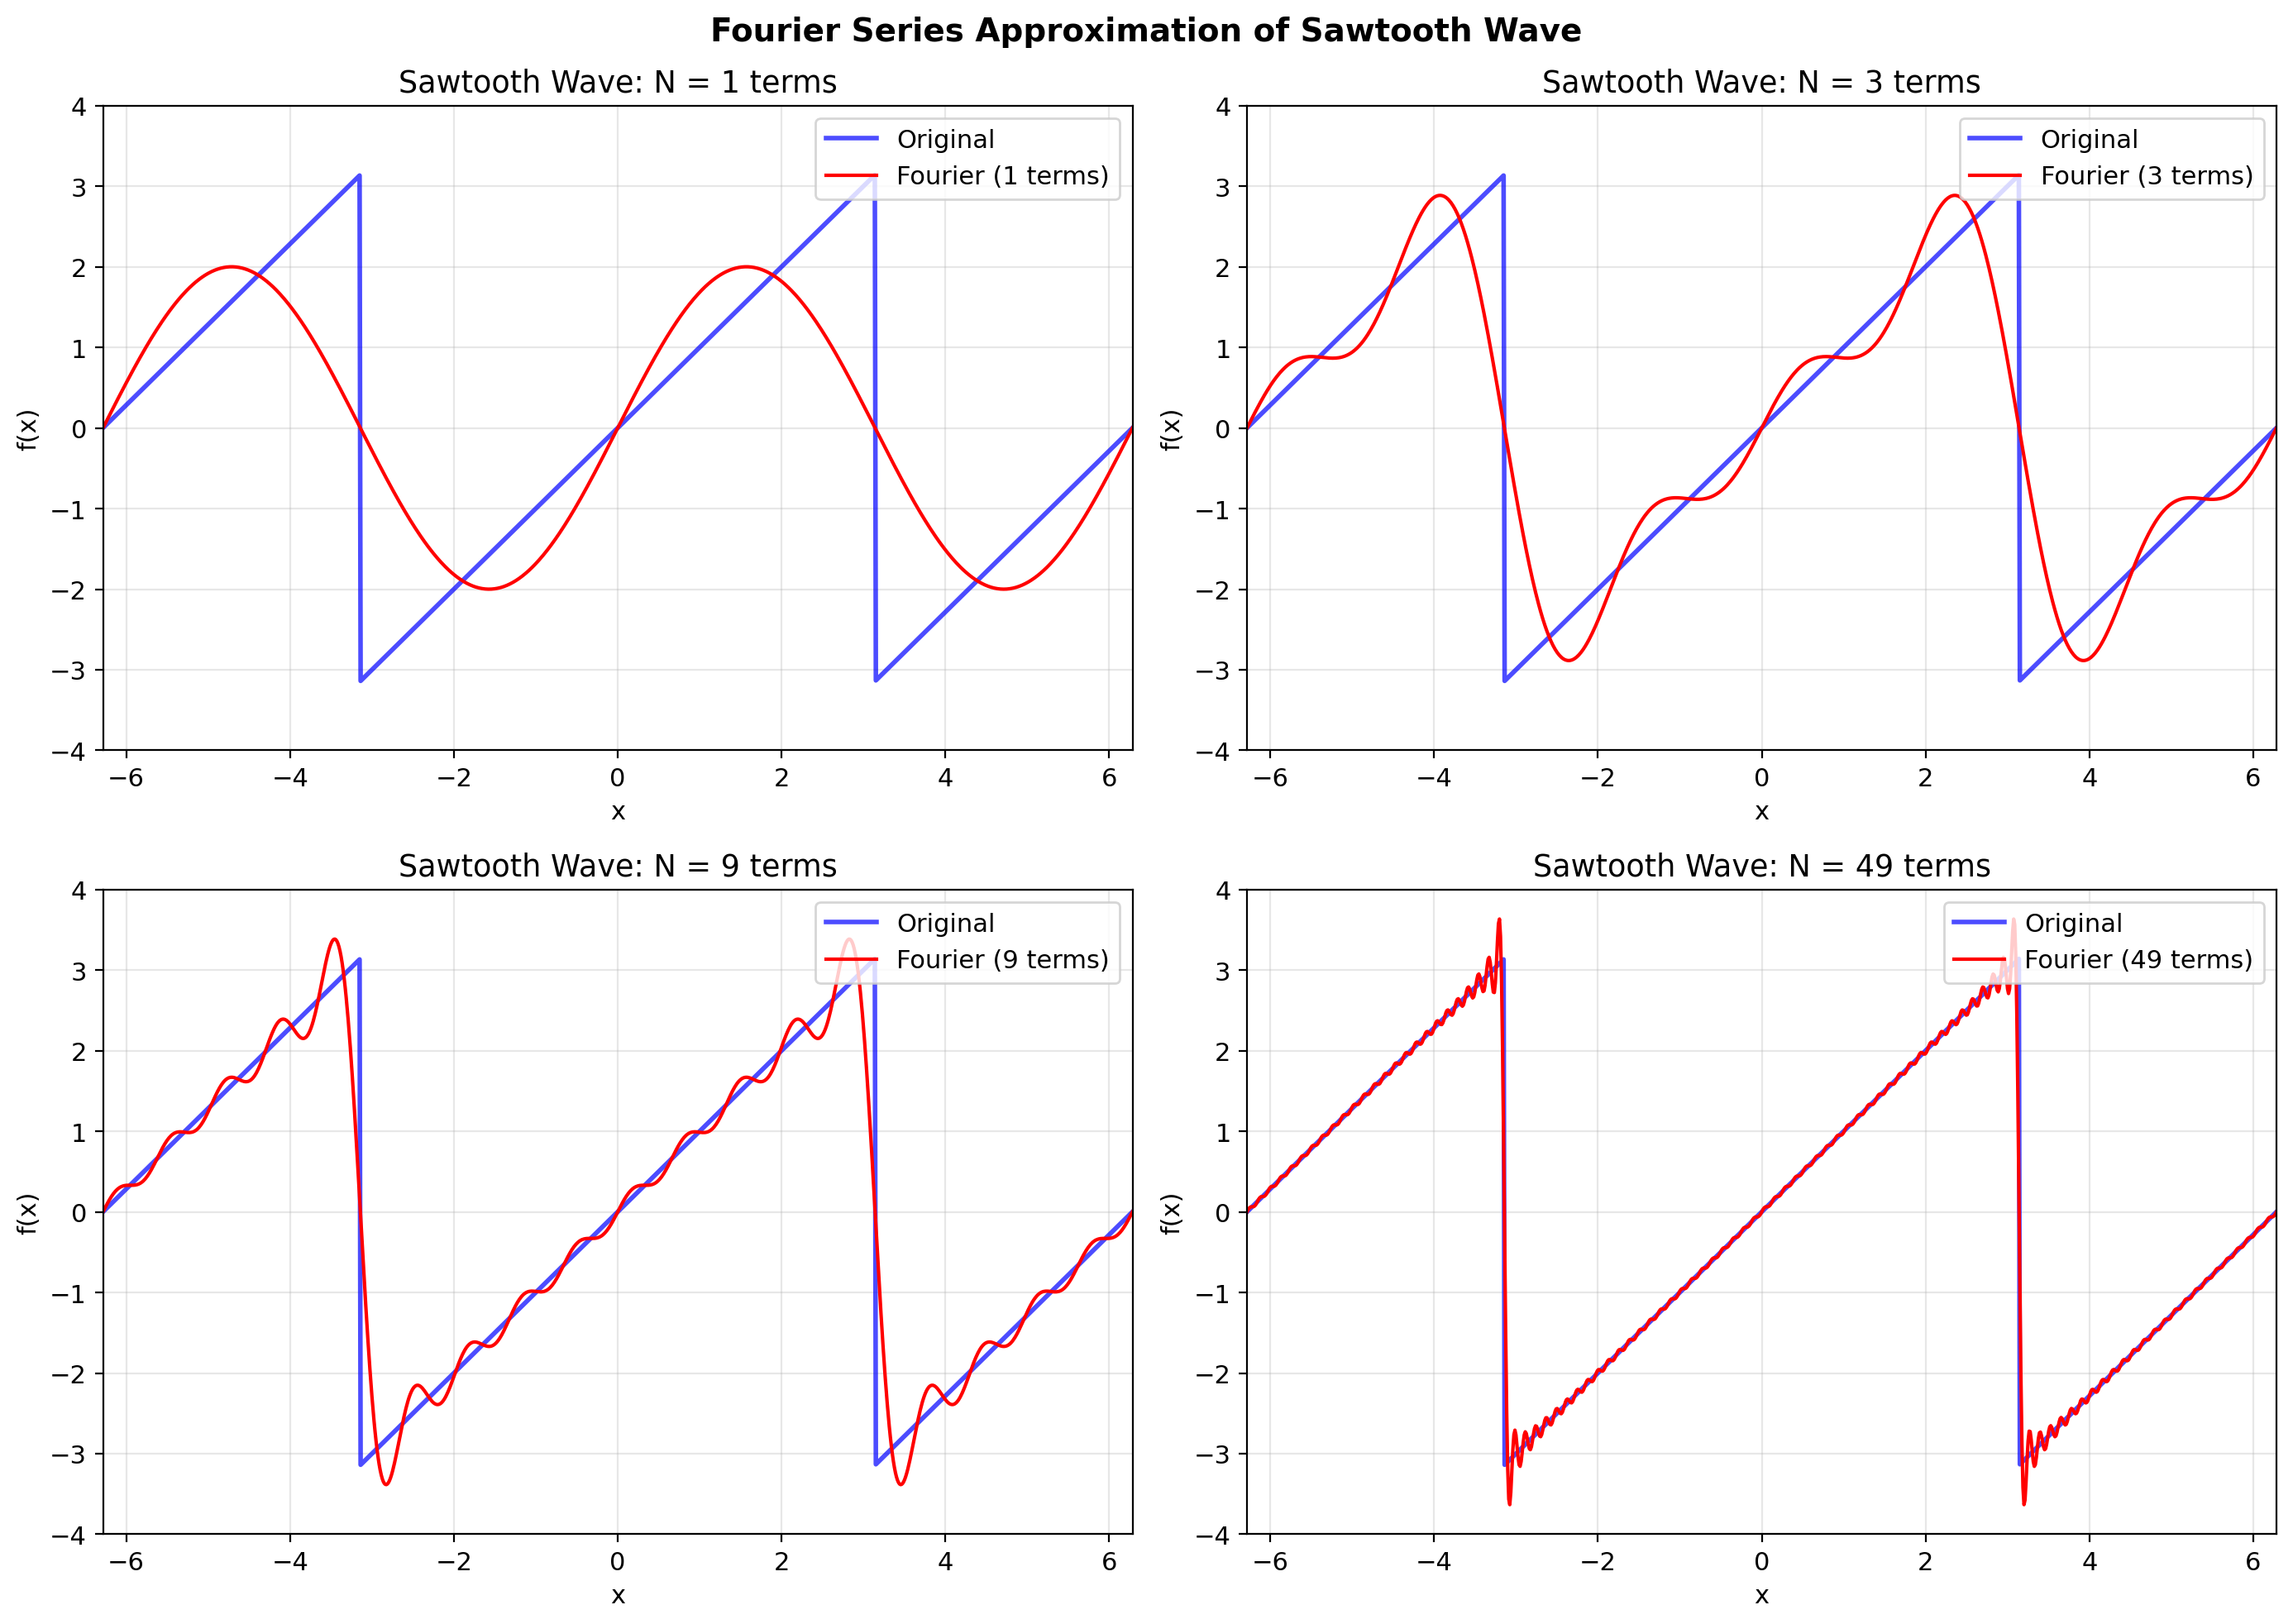

In [4]:
# Define the sawtooth wave
def sawtooth_wave(x):
    """Sawtooth wave with period 2π."""
    return np.mod(x + np.pi, 2*np.pi) - np.pi

# Compute and plot
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, N in enumerate(terms_list):
    a, b = compute_fourier_coefficients(sawtooth_wave, L, N)
    S = fourier_series_partial_sum(x, a, b, L)
    
    axes[idx].plot(x, sawtooth_wave(x), 'b-', linewidth=2, label='Original', alpha=0.7)
    axes[idx].plot(x, S, 'r-', linewidth=1.5, label=f'Fourier ({N} terms)')
    axes[idx].set_xlabel('x')
    axes[idx].set_ylabel('f(x)')
    axes[idx].set_title(f'Sawtooth Wave: N = {N} terms')
    axes[idx].legend(loc='upper right')
    axes[idx].set_xlim(-2*np.pi, 2*np.pi)
    axes[idx].set_ylim(-4, 4)

plt.suptitle('Fourier Series Approximation of Sawtooth Wave', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 3.4 Example 3: Triangle Wave

The triangle wave is defined as:

$$f(x) = |x| \quad \text{for } -\pi < x < \pi$$

Its Fourier series is:

$$f(x) = \frac{\pi}{2} - \frac{4}{\pi} \sum_{n=1,3,5,...}^{\infty} \frac{1}{n^2} \cos(nx)$$

Note that this series converges much faster than the square wave because the coefficients decay as $1/n^2$ rather than $1/n$.

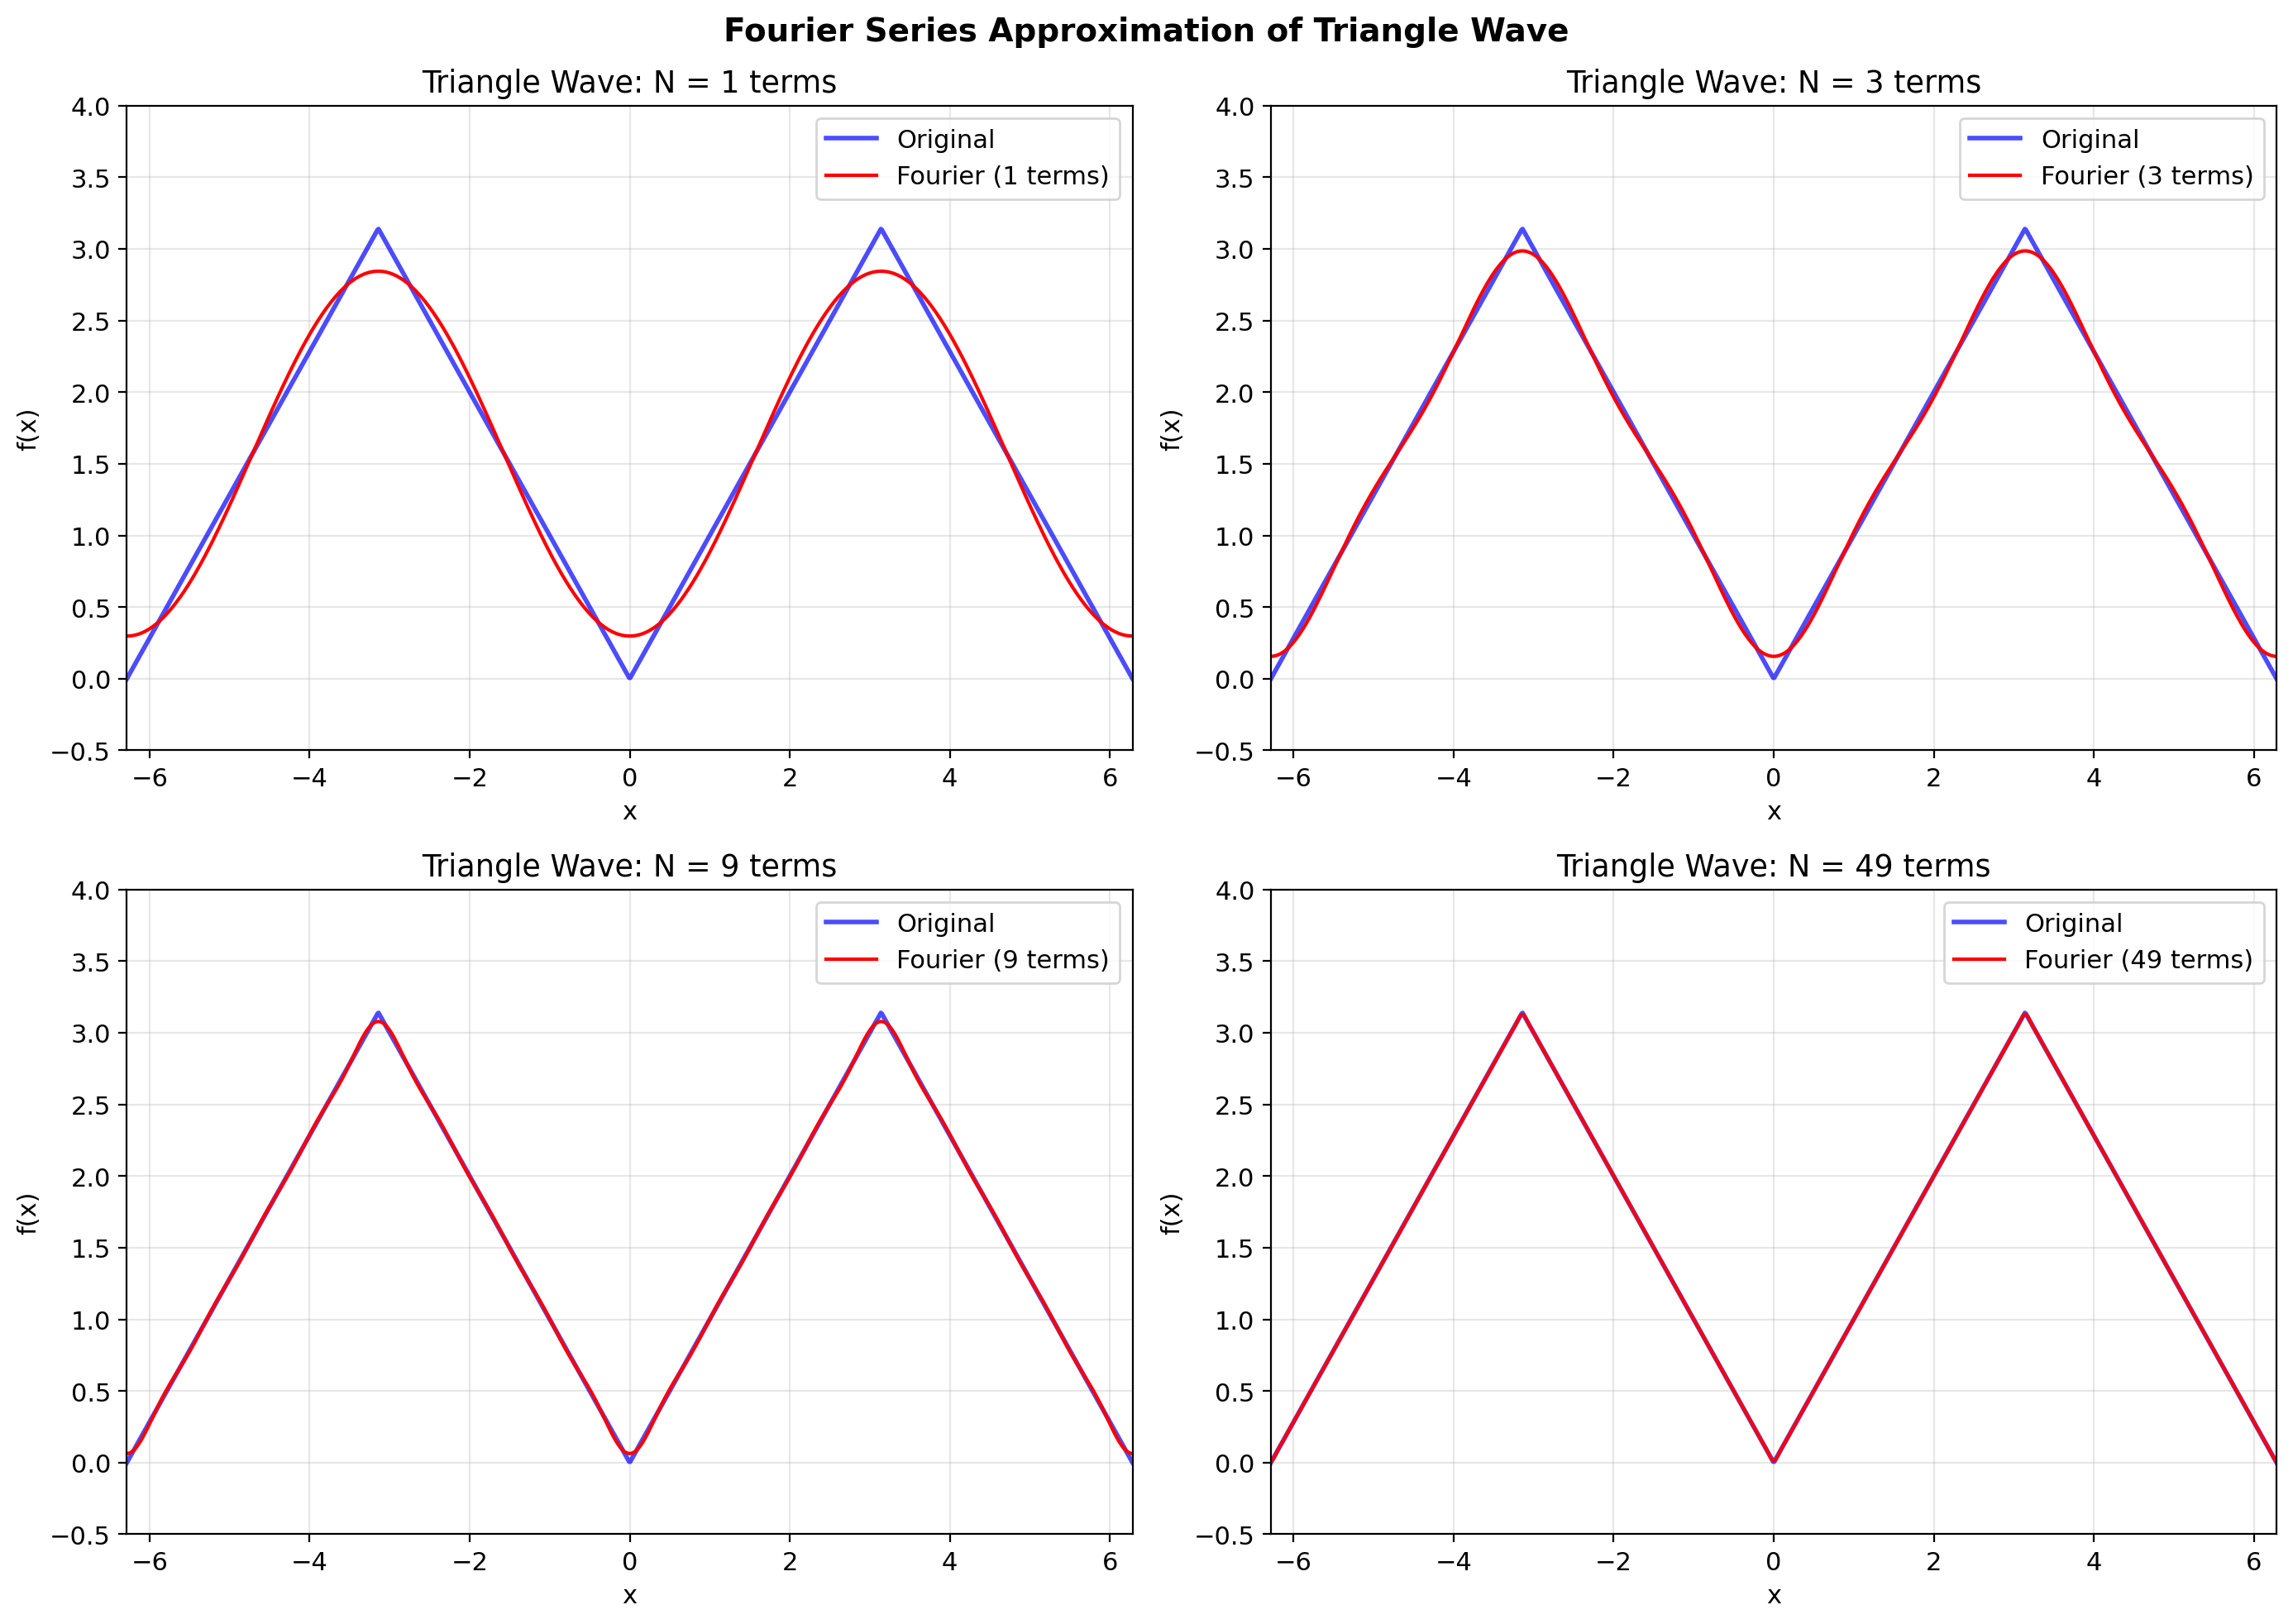

In [5]:
# Define the triangle wave
def triangle_wave(x):
    """Triangle wave with period 2π."""
    return np.abs(np.mod(x + np.pi, 2*np.pi) - np.pi)

# Compute and plot
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, N in enumerate(terms_list):
    a, b = compute_fourier_coefficients(triangle_wave, L, N)
    S = fourier_series_partial_sum(x, a, b, L)
    
    axes[idx].plot(x, triangle_wave(x), 'b-', linewidth=2, label='Original', alpha=0.7)
    axes[idx].plot(x, S, 'r-', linewidth=1.5, label=f'Fourier ({N} terms)')
    axes[idx].set_xlabel('x')
    axes[idx].set_ylabel('f(x)')
    axes[idx].set_title(f'Triangle Wave: N = {N} terms')
    axes[idx].legend(loc='upper right')
    axes[idx].set_xlim(-2*np.pi, 2*np.pi)
    axes[idx].set_ylim(-0.5, 4)

plt.suptitle('Fourier Series Approximation of Triangle Wave', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

### 3.5 Gibbs Phenomenon Analysis

The Gibbs phenomenon is the overshoot that occurs near discontinuities when using Fourier series. This overshoot persists as the number of terms increases, converging to approximately 8.95% of the jump discontinuity.

/tmp/ipykernel_154590/3376806820.py:36: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  b[n-1] = (1/L) * integrate.quad(integrand_b, -L, L)[0]
/tmp/ipykernel_154590/3376806820.py:36: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  b[n-1] = (1/L) * integrate.quad(integrand_b, -L, L)[0]


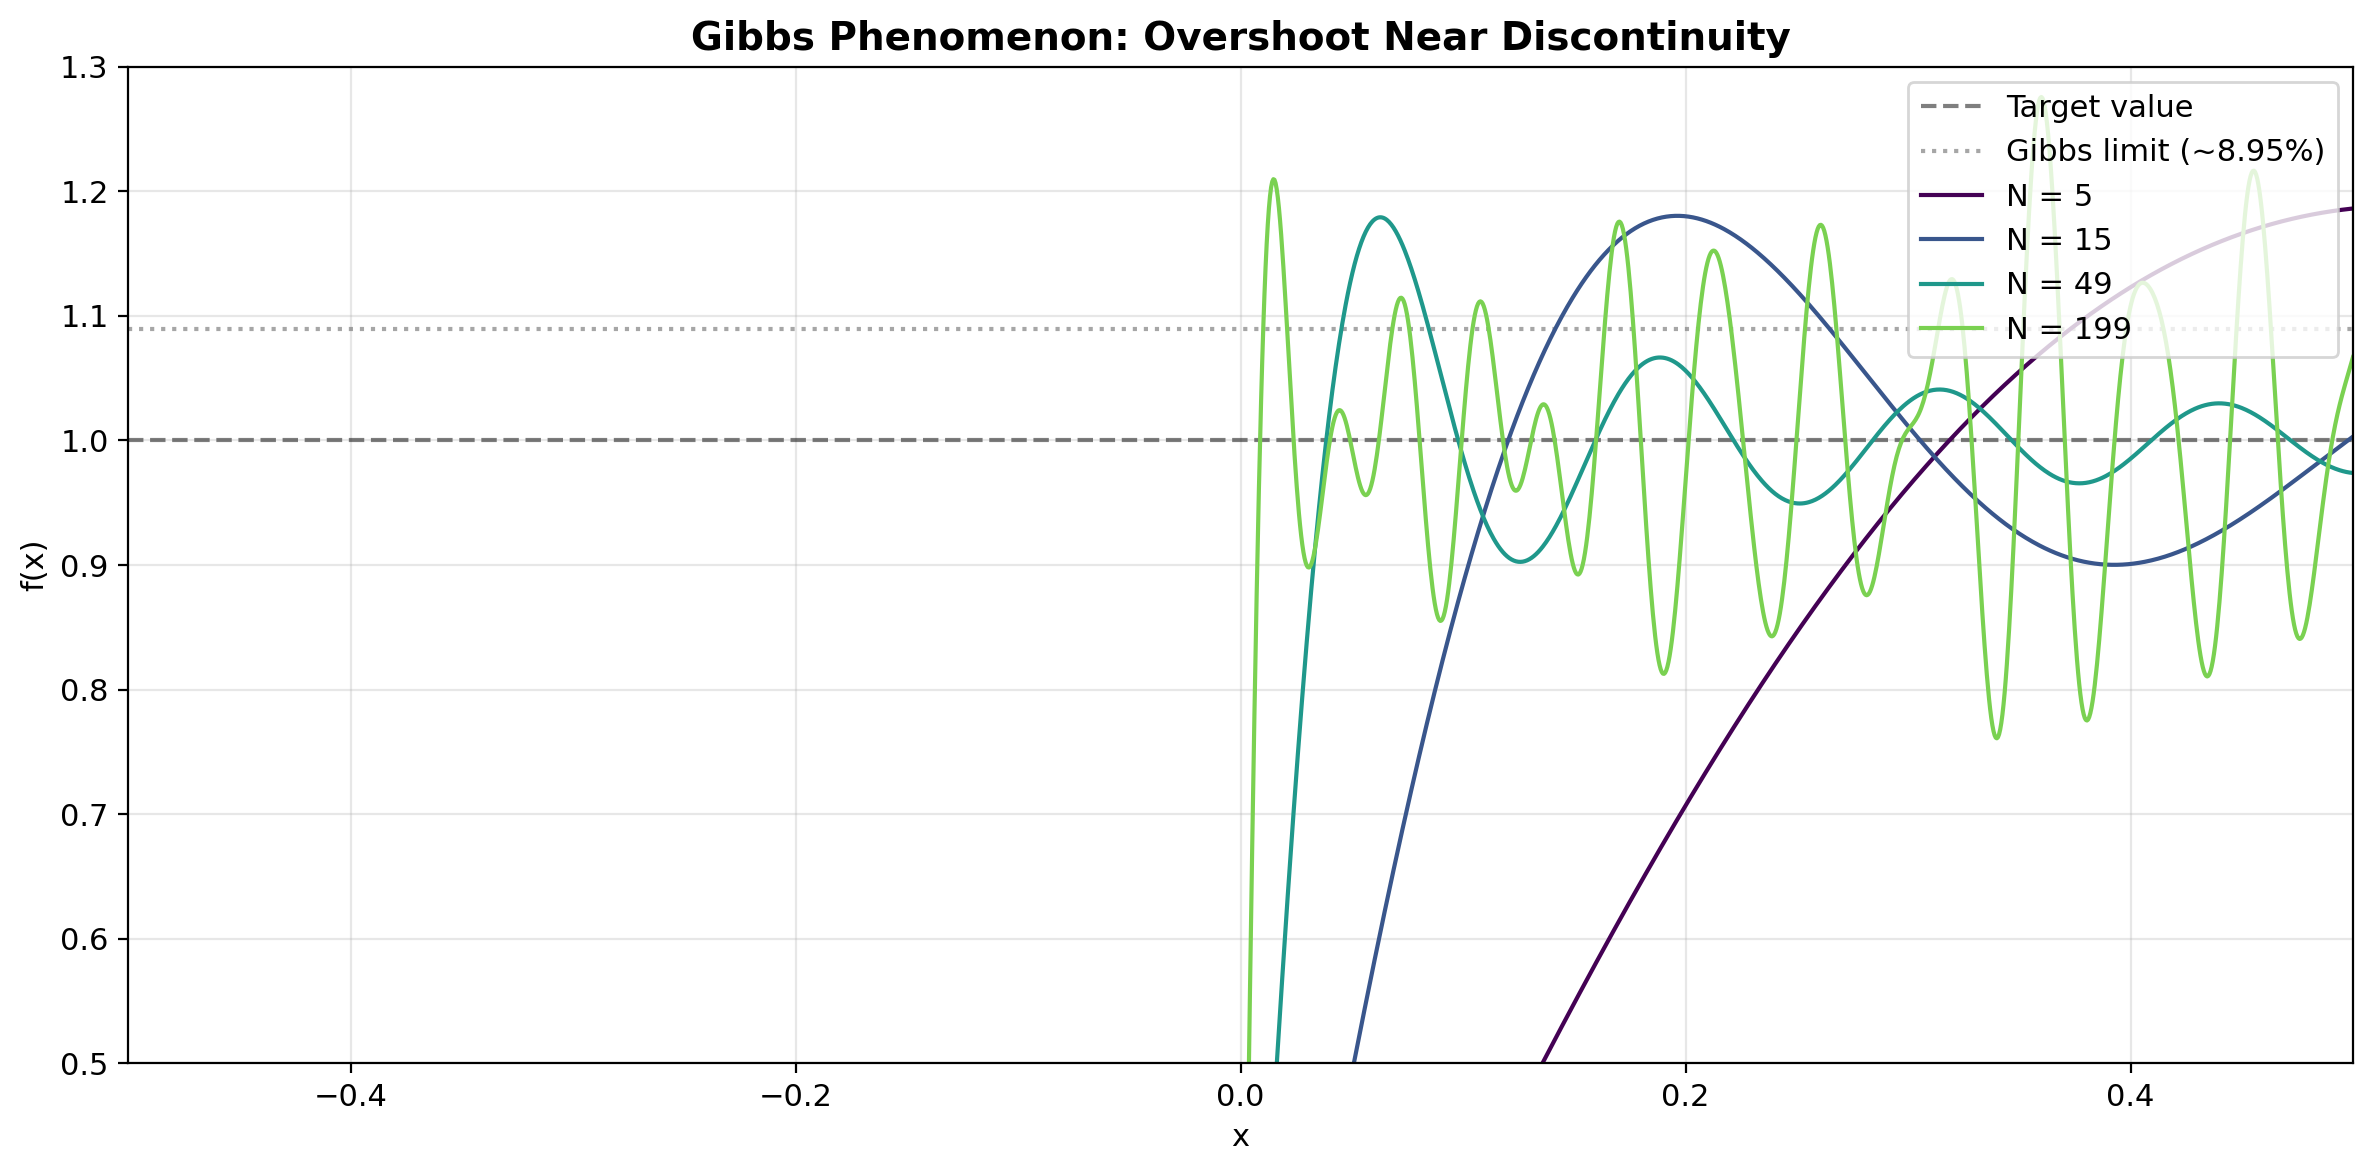

In [6]:
# Analyze Gibbs phenomenon for square wave
x_fine = np.linspace(-0.5, 0.5, 2000)
terms_gibbs = [5, 15, 49, 199]

fig, ax = plt.subplots(figsize=(12, 6))

ax.axhline(y=1, color='k', linestyle='--', alpha=0.5, label='Target value')
ax.axhline(y=1.0895, color='gray', linestyle=':', alpha=0.7, label='Gibbs limit (~8.95%)')

colors = plt.cm.viridis(np.linspace(0, 0.8, len(terms_gibbs)))

for N, color in zip(terms_gibbs, colors):
    a, b = compute_fourier_coefficients(square_wave, L, N)
    S = fourier_series_partial_sum(x_fine, a, b, L)
    ax.plot(x_fine, S, color=color, linewidth=1.5, label=f'N = {N}')

ax.set_xlabel('x')
ax.set_ylabel('f(x)')
ax.set_title('Gibbs Phenomenon: Overshoot Near Discontinuity', fontsize=14, fontweight='bold')
ax.legend(loc='upper right')
ax.set_xlim(-0.5, 0.5)
ax.set_ylim(0.5, 1.3)

plt.tight_layout()
plt.show()

### 3.6 Coefficient Decay Analysis

The rate at which Fourier coefficients decay provides insight into the smoothness of the original function:
- Jump discontinuities: $O(1/n)$
- Continuous but not differentiable: $O(1/n^2)$
- Smooth functions: exponentially fast decay

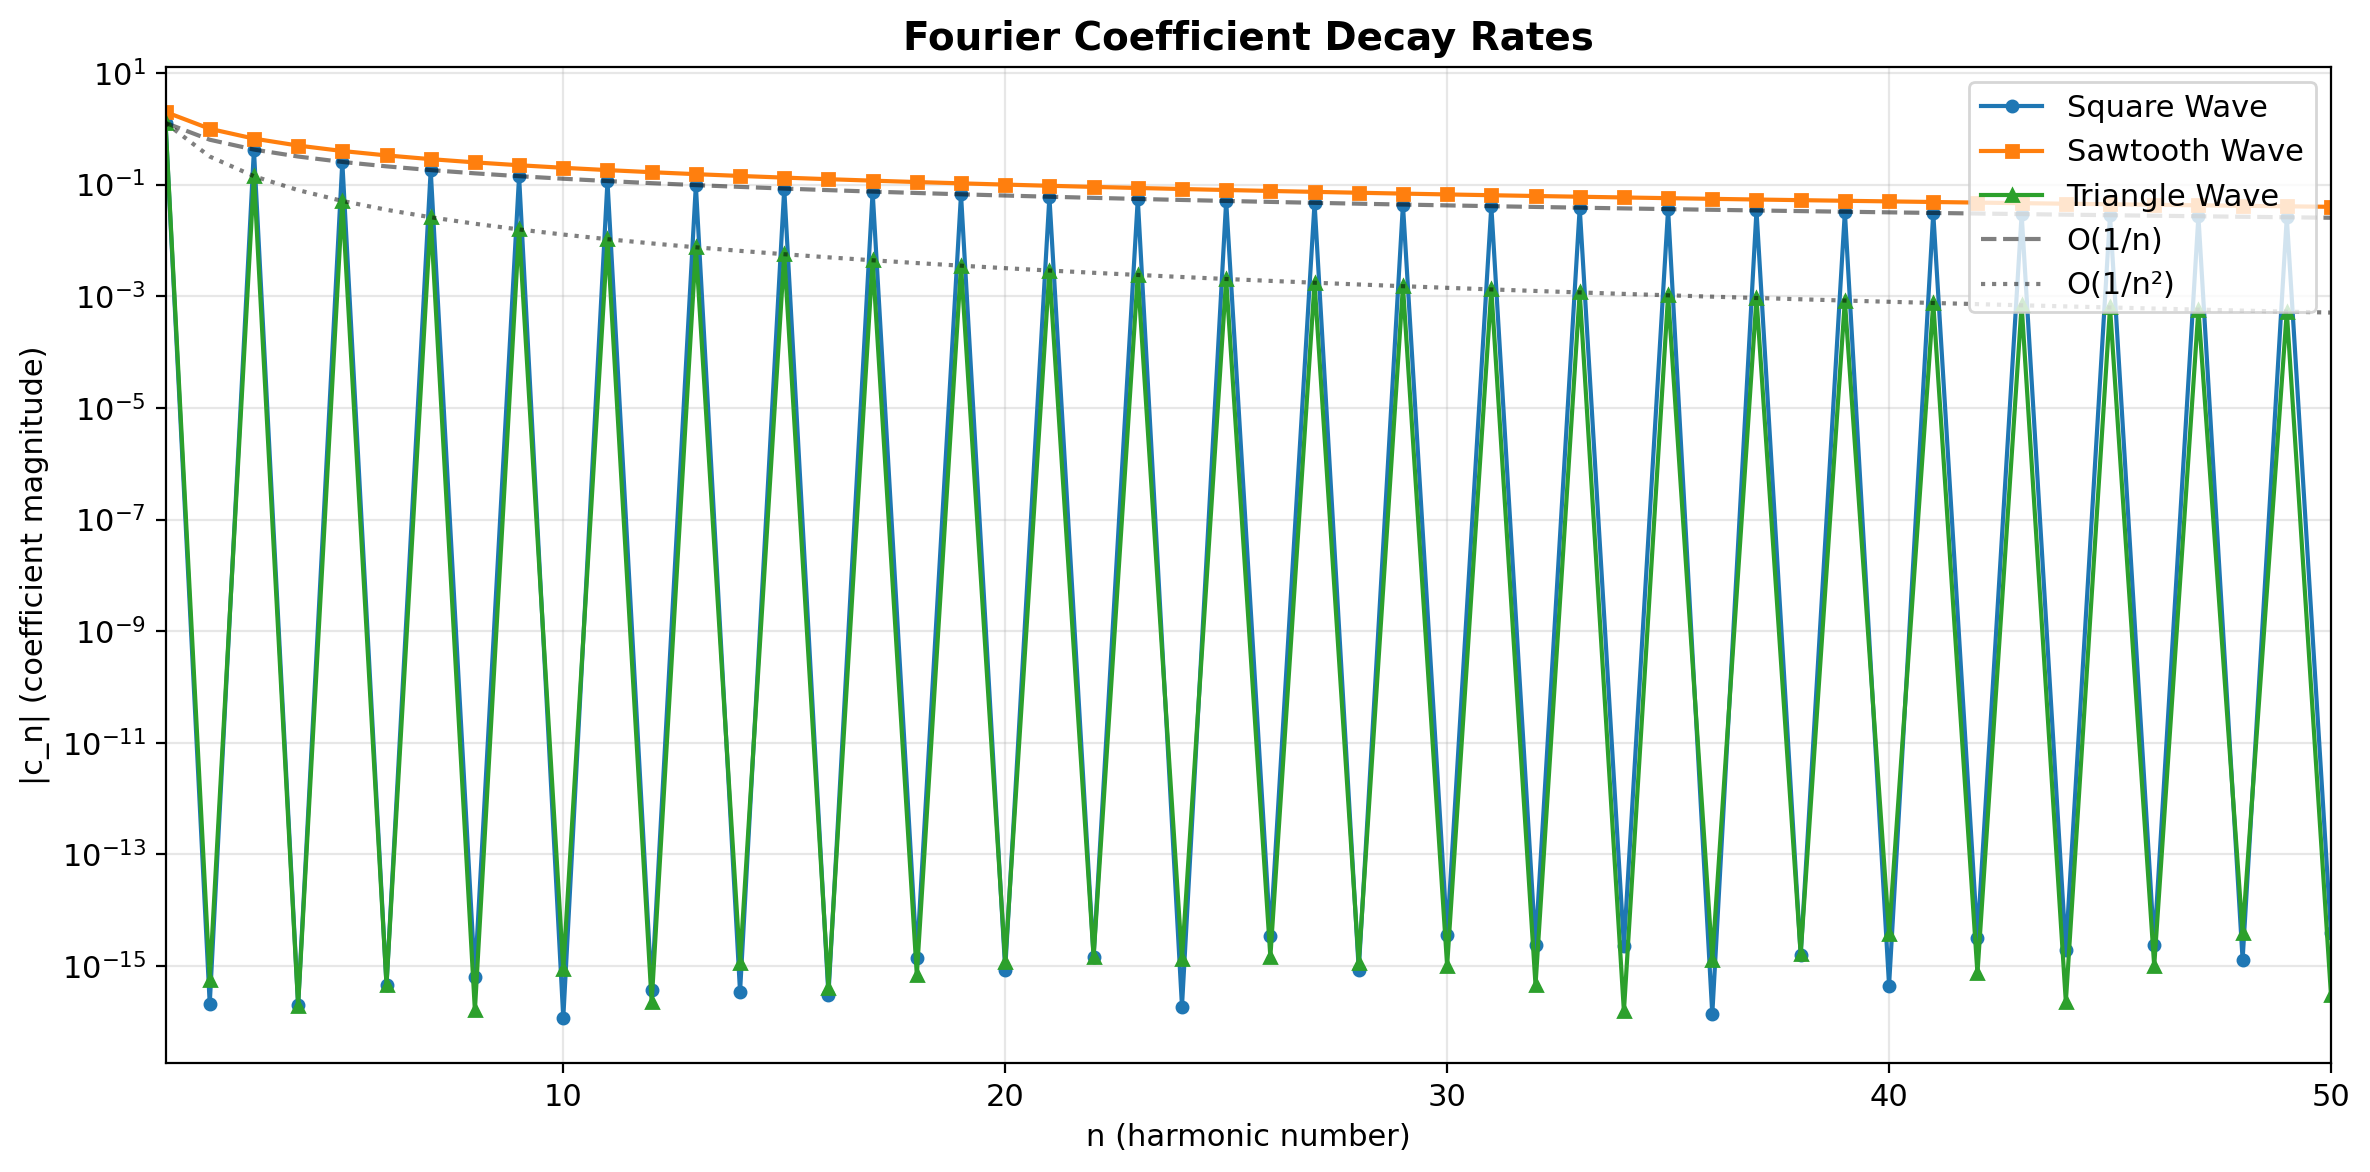

In [7]:
# Compare coefficient decay for different waveforms
N_decay = 50

# Compute coefficients
a_square, b_square = compute_fourier_coefficients(square_wave, L, N_decay)
a_saw, b_saw = compute_fourier_coefficients(sawtooth_wave, L, N_decay)
a_tri, b_tri = compute_fourier_coefficients(triangle_wave, L, N_decay)

# Compute magnitudes
n_vals = np.arange(1, N_decay + 1)
mag_square = np.sqrt(a_square[1:]**2 + b_square**2)
mag_saw = np.sqrt(a_saw[1:]**2 + b_saw**2)
mag_tri = np.sqrt(a_tri[1:]**2 + b_tri**2)

fig, ax = plt.subplots(figsize=(12, 6))

ax.semilogy(n_vals, mag_square + 1e-16, 'o-', markersize=4, label='Square Wave')
ax.semilogy(n_vals, mag_saw + 1e-16, 's-', markersize=4, label='Sawtooth Wave')
ax.semilogy(n_vals, mag_tri + 1e-16, '^-', markersize=4, label='Triangle Wave')

# Reference lines
ax.semilogy(n_vals, 4/(np.pi*n_vals), 'k--', alpha=0.5, label='O(1/n)')
ax.semilogy(n_vals, 4/(np.pi*n_vals**2), 'k:', alpha=0.5, label='O(1/n²)')

ax.set_xlabel('n (harmonic number)')
ax.set_ylabel('|c_n| (coefficient magnitude)')
ax.set_title('Fourier Coefficient Decay Rates', fontsize=14, fontweight='bold')
ax.legend(loc='upper right')
ax.set_xlim(1, N_decay)

plt.tight_layout()
plt.show()

### 3.7 Power Spectrum and Parseval's Theorem

We verify Parseval's theorem by comparing the energy in the time domain with the sum of squared coefficients.

/tmp/ipykernel_154590/3376806820.py:36: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  b[n-1] = (1/L) * integrate.quad(integrand_b, -L, L)[0]


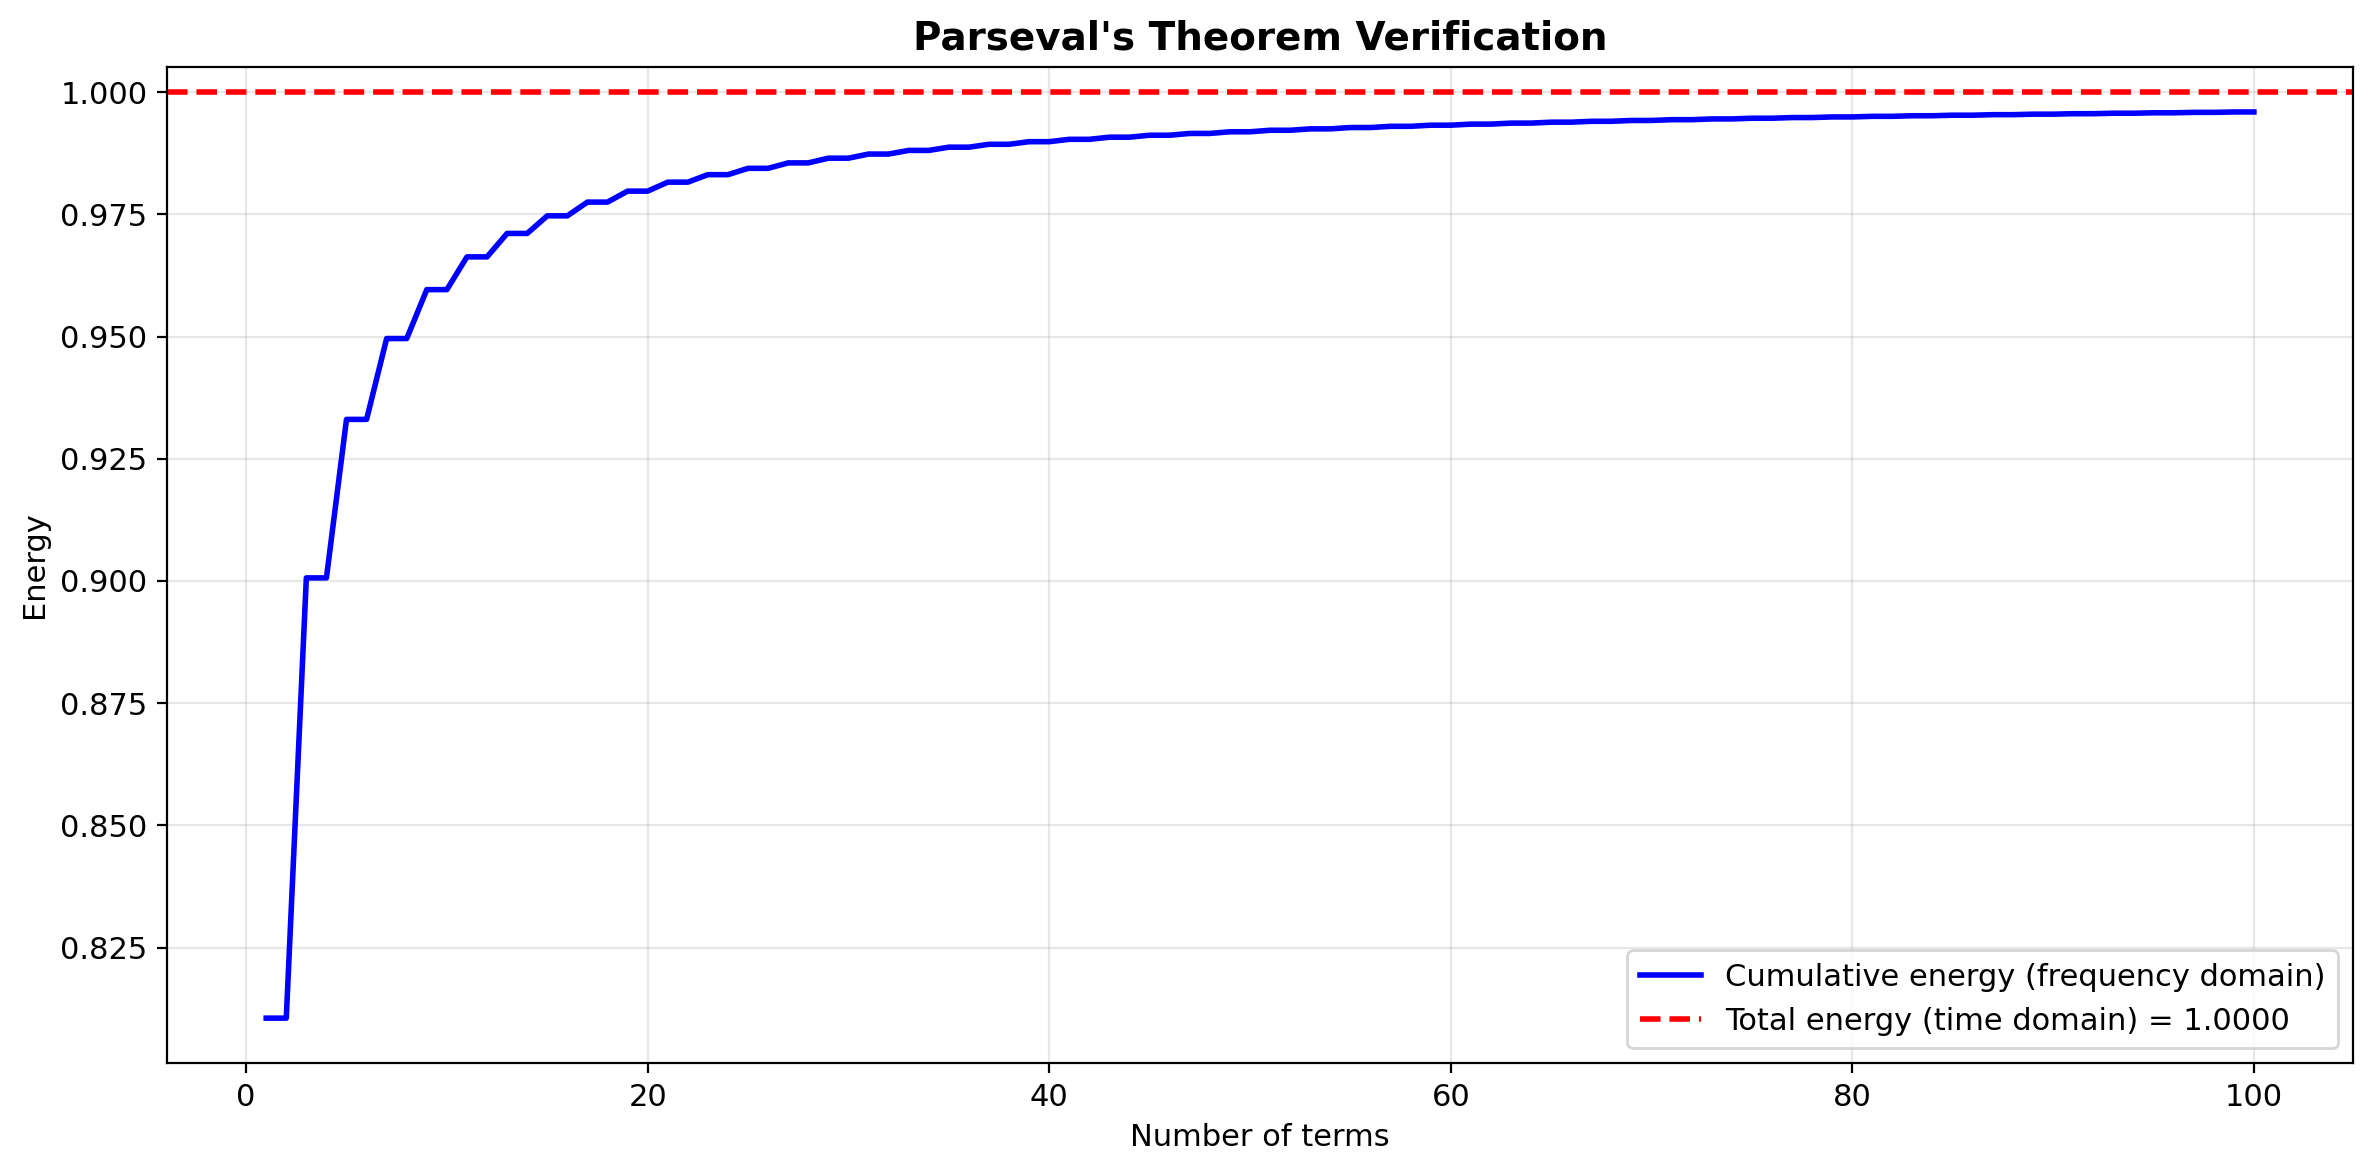

Time domain energy: 1.000000
Frequency domain energy (N=100): 0.995947
Relative error: 0.4053%


In [8]:
# Verify Parseval's theorem for the square wave
N_parseval = 100
a_p, b_p = compute_fourier_coefficients(square_wave, L, N_parseval)

# Time domain energy
energy_time = (1/(2*L)) * integrate.quad(lambda x: square_wave(x)**2, -L, L)[0]

# Frequency domain energy (cumulative)
n_terms = np.arange(1, N_parseval + 1)
energy_freq_cumulative = np.zeros(N_parseval)
energy_freq_cumulative[0] = a_p[0]**2 / 4 + (a_p[1]**2 + b_p[0]**2) / 2

for i in range(1, N_parseval):
    energy_freq_cumulative[i] = energy_freq_cumulative[i-1] + (a_p[i+1]**2 + b_p[i]**2) / 2

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(n_terms, energy_freq_cumulative, 'b-', linewidth=2, label='Cumulative energy (frequency domain)')
ax.axhline(y=energy_time, color='r', linestyle='--', linewidth=2, label=f'Total energy (time domain) = {energy_time:.4f}')

ax.set_xlabel('Number of terms')
ax.set_ylabel('Energy')
ax.set_title("Parseval's Theorem Verification", fontsize=14, fontweight='bold')
ax.legend(loc='lower right')

plt.tight_layout()
plt.show()

print(f"Time domain energy: {energy_time:.6f}")
print(f"Frequency domain energy (N={N_parseval}): {energy_freq_cumulative[-1]:.6f}")
print(f"Relative error: {abs(energy_time - energy_freq_cumulative[-1])/energy_time * 100:.4f}%")

## 4. Summary Visualization and Final Output

We create a comprehensive summary figure showing all three waveforms and their Fourier series approximations.

/tmp/ipykernel_154590/2345107608.py:56: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


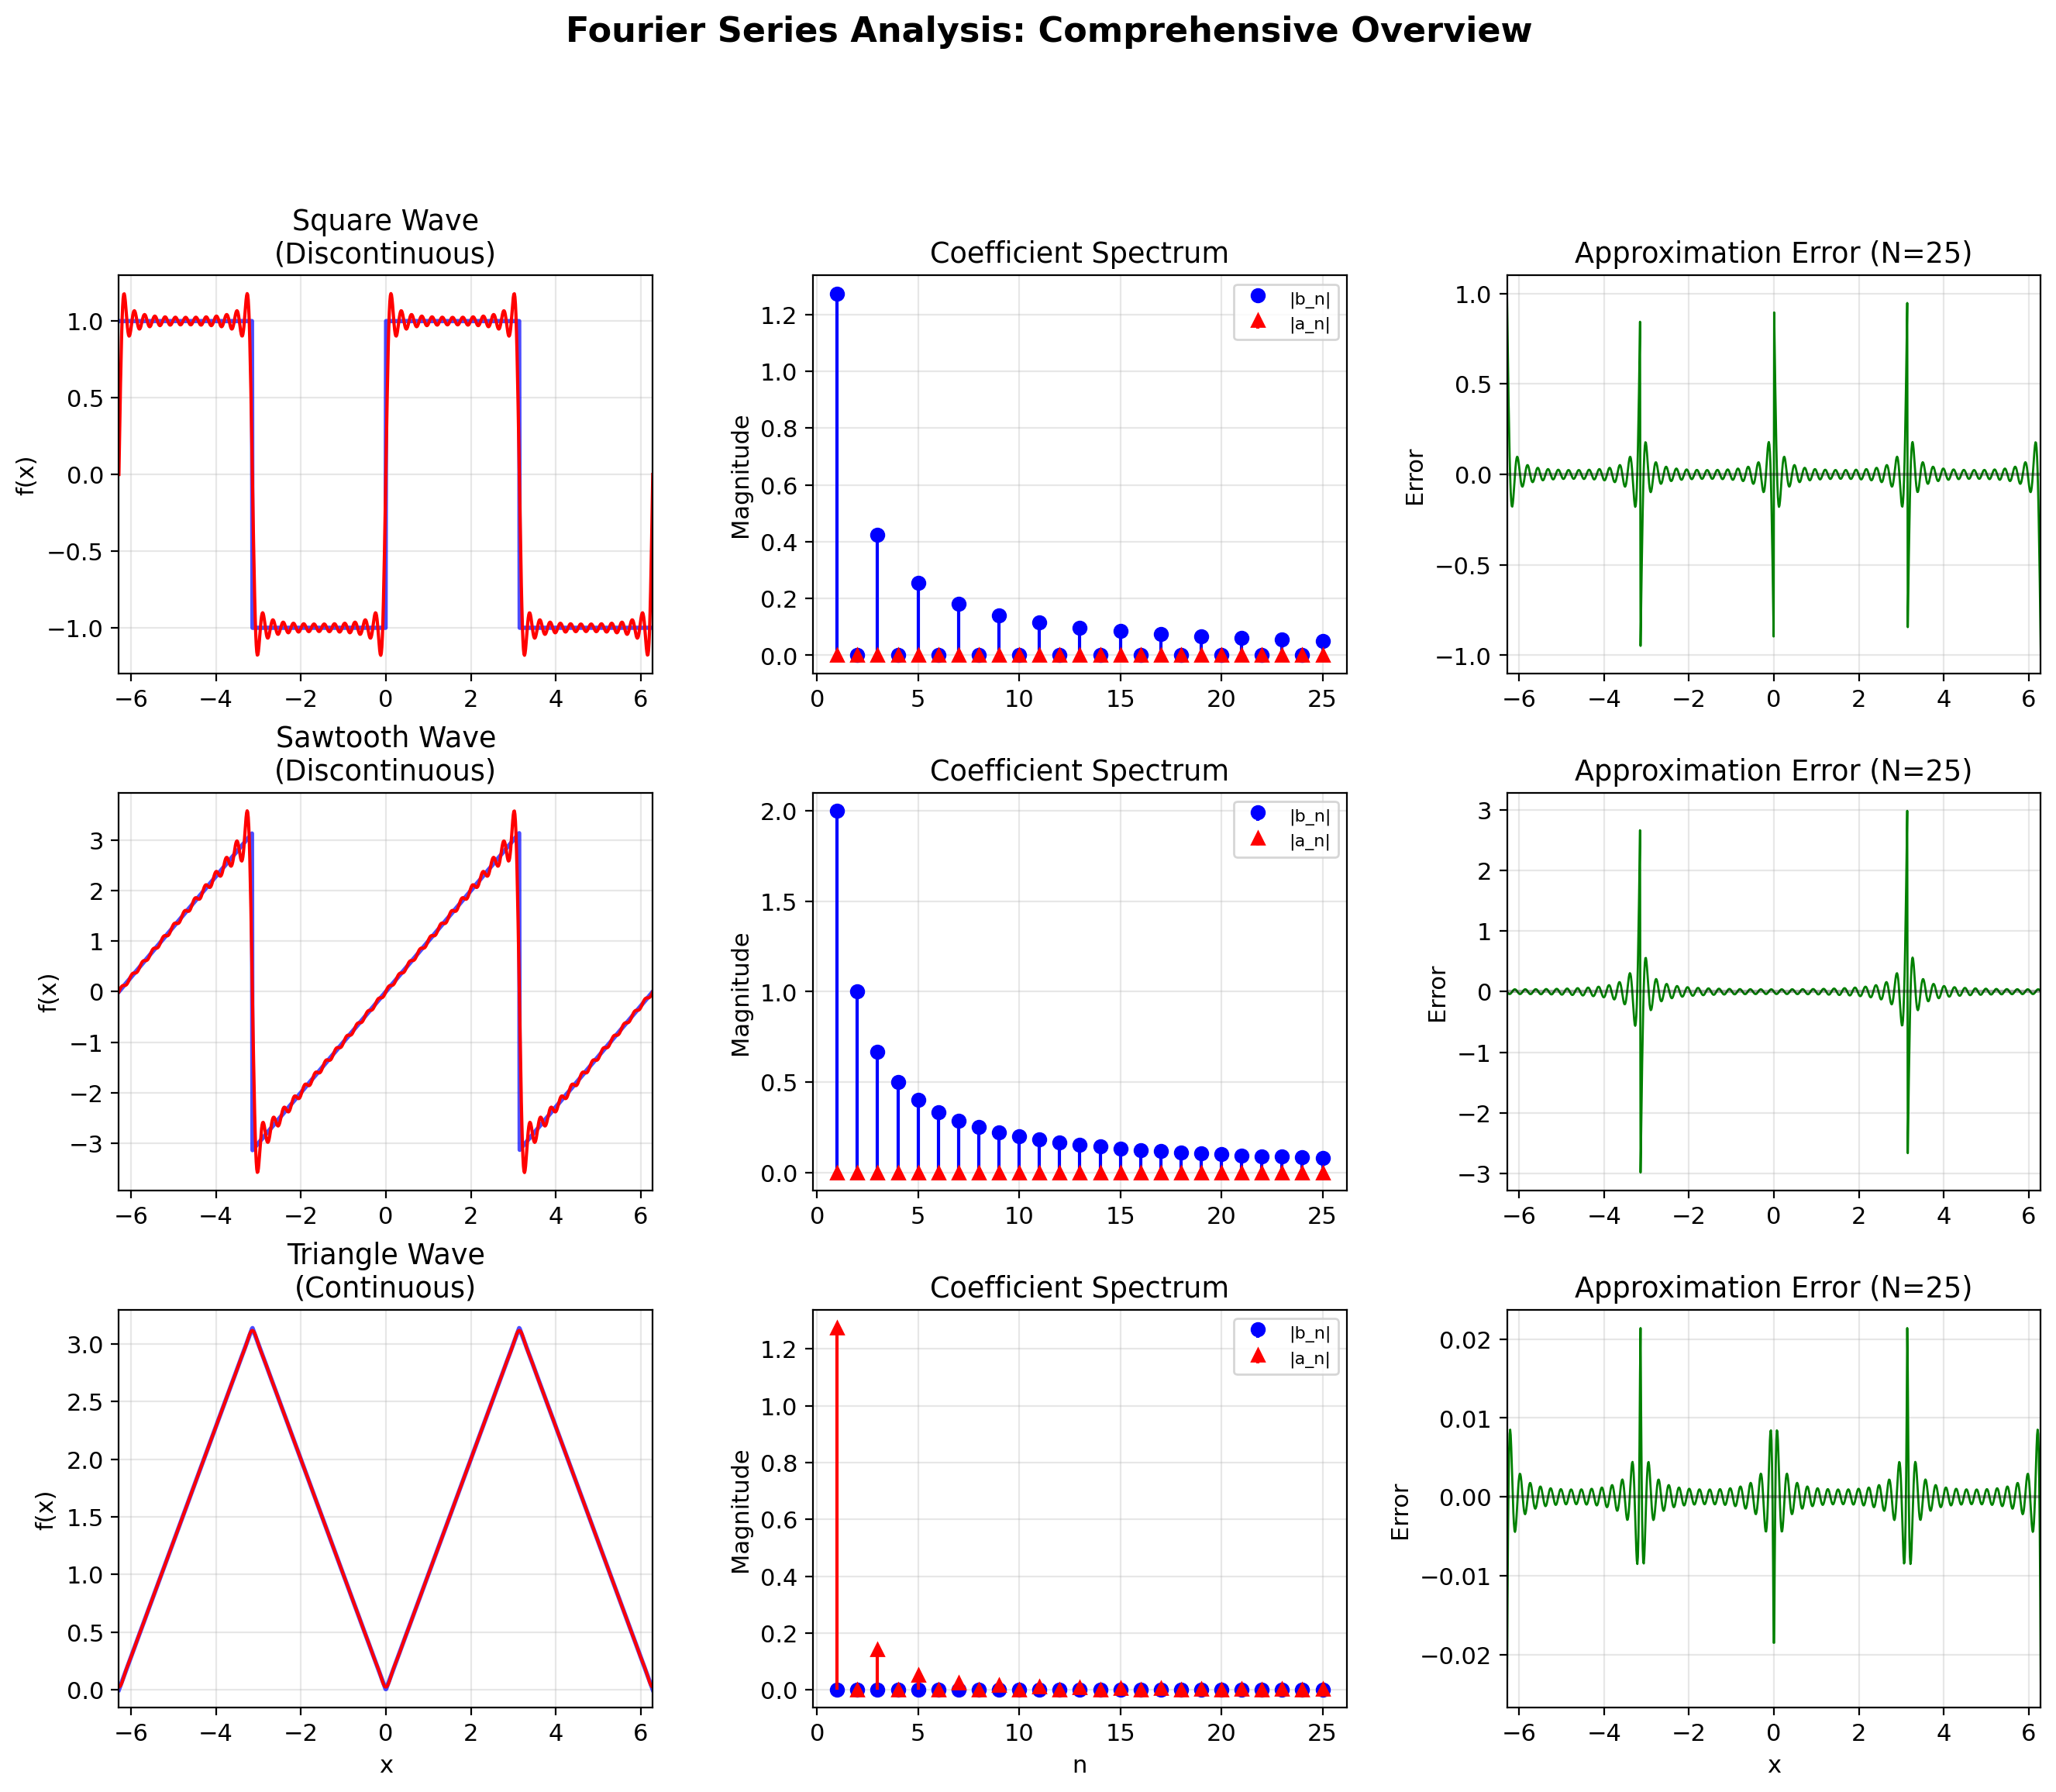


Figure saved to 'plot.png'


In [9]:
# Create comprehensive summary figure
fig = plt.figure(figsize=(16, 12))

# Grid specification for layout
gs = fig.add_gridspec(3, 3, hspace=0.3, wspace=0.3)

# Define waveforms and their properties
waveforms = [
    (square_wave, 'Square Wave', 'Discontinuous'),
    (sawtooth_wave, 'Sawtooth Wave', 'Discontinuous'),
    (triangle_wave, 'Triangle Wave', 'Continuous')
]

N_summary = 25
x_plot = np.linspace(-2*np.pi, 2*np.pi, 1000)

for row, (func, name, continuity) in enumerate(waveforms):
    # Compute coefficients
    a, b = compute_fourier_coefficients(func, L, N_summary)
    S = fourier_series_partial_sum(x_plot, a, b, L)
    
    # Waveform plot
    ax1 = fig.add_subplot(gs[row, 0])
    ax1.plot(x_plot, func(x_plot), 'b-', linewidth=2, alpha=0.7)
    ax1.plot(x_plot, S, 'r-', linewidth=1.5)
    ax1.set_ylabel('f(x)')
    ax1.set_title(f'{name}\n({continuity})')
    ax1.set_xlim(-2*np.pi, 2*np.pi)
    if row == 2:
        ax1.set_xlabel('x')
    
    # Coefficient spectrum
    ax2 = fig.add_subplot(gs[row, 1])
    n_vals = np.arange(1, N_summary + 1)
    ax2.stem(n_vals, np.abs(b), basefmt=' ', linefmt='b-', markerfmt='bo', label='|b_n|')
    ax2.stem(n_vals, np.abs(a[1:]), basefmt=' ', linefmt='r-', markerfmt='r^', label='|a_n|')
    ax2.set_ylabel('Magnitude')
    ax2.set_title('Coefficient Spectrum')
    ax2.legend(loc='upper right', fontsize=8)
    if row == 2:
        ax2.set_xlabel('n')
    
    # Error analysis
    ax3 = fig.add_subplot(gs[row, 2])
    error = func(x_plot) - S
    ax3.plot(x_plot, error, 'g-', linewidth=1)
    ax3.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax3.set_ylabel('Error')
    ax3.set_title(f'Approximation Error (N={N_summary})')
    ax3.set_xlim(-2*np.pi, 2*np.pi)
    if row == 2:
        ax3.set_xlabel('x')

fig.suptitle('Fourier Series Analysis: Comprehensive Overview', fontsize=16, fontweight='bold', y=1.02)

plt.tight_layout()
plt.savefig('fourier_series_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nFigure saved to 'plot.png'")

## 5. Conclusions

This notebook demonstrated the fundamental concepts of Fourier series:

1. **Mathematical Foundation**: The Fourier series decomposes periodic functions into sinusoidal components using orthogonality of trigonometric functions.

2. **Convergence Behavior**: 
   - Continuous functions (triangle wave) converge rapidly with coefficients decaying as $O(1/n^2)$
   - Discontinuous functions (square, sawtooth) converge slower with $O(1/n)$ decay

3. **Gibbs Phenomenon**: Near discontinuities, Fourier partial sums exhibit persistent overshoots of ~8.95%, regardless of the number of terms.

4. **Energy Conservation**: Parseval's theorem confirms that signal energy is preserved between time and frequency domains.

These concepts form the foundation for more advanced topics including the Discrete Fourier Transform (DFT), Fast Fourier Transform (FFT), and spectral analysis methods widely used in signal processing and scientific computing.